In [6]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav

#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap= "coolwarm"

In [ ]:
folder = '/Users/savani/Downloads/2p_data/fed 30 sucrose/'
path = os.path.join(folder, os.listdir(folder)[2], 'suite2p', 'plane0')
# path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p_manual'
matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
print(bout_start)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

[   0    0    0    0 2252 4420    0    0 1530    0    0  537  364    0
  945  294    0    0  632  925  977    0    0    0    0 4239    0    0
    0    0]


Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/fasted 30 sucrose/glp4_fasted_nocues_L180_p815_650um031124-003/suite2p/plane0')

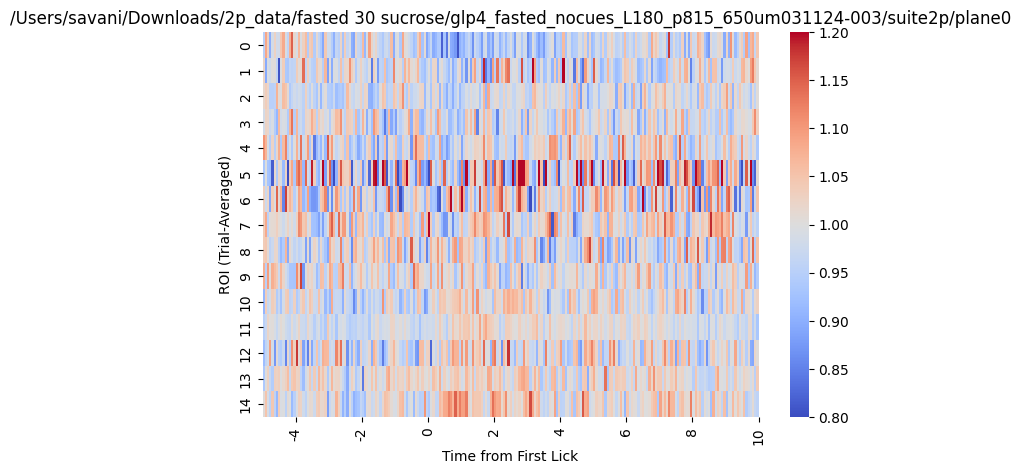

In [76]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='coolwarm')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")

ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/fasted 30 sucrose/glp17_fasted30suc_L150P800_565um-032/suite2p/plane0')

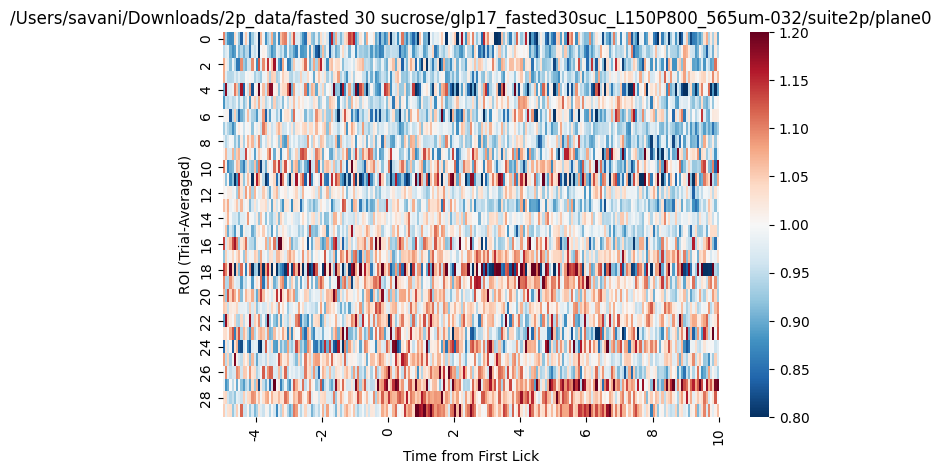

In [50]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='RdBu_r')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/fasted 30 sucrose/glp17_fasted30suc_L150P800_565um-032/suite2p/plane0')

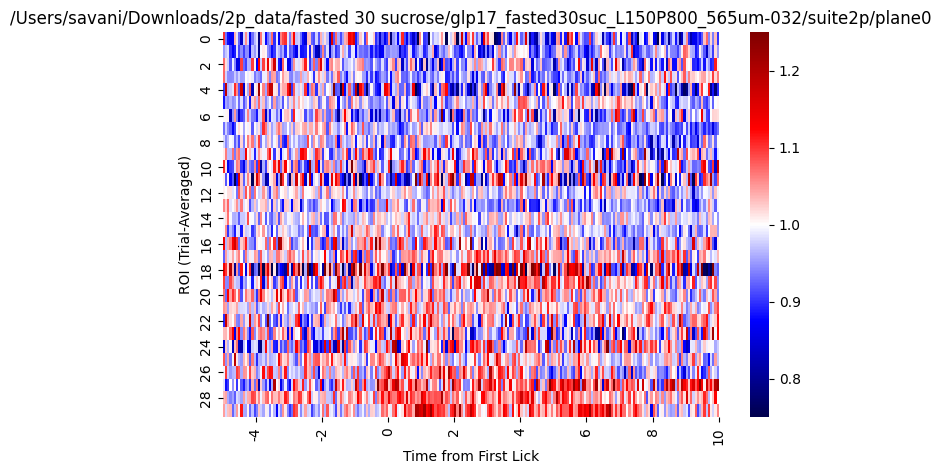

In [51]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.75, vmax=1.25, cmap='seismic')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

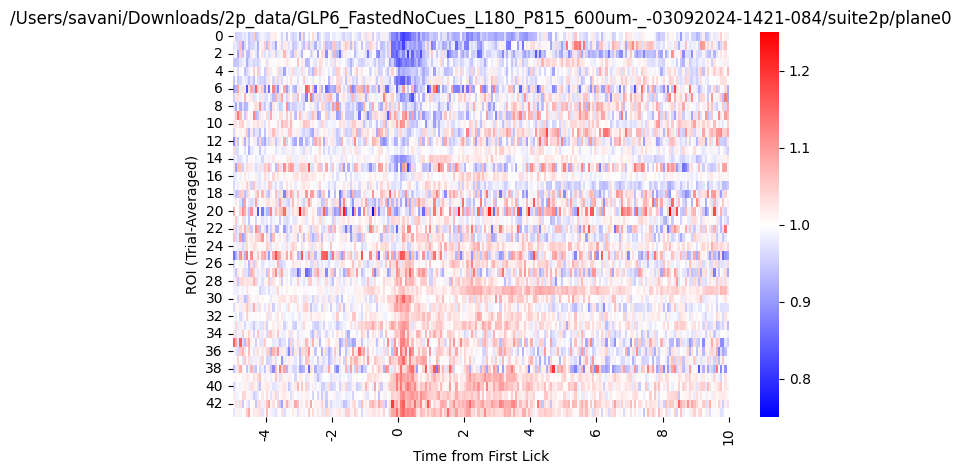

In [ ]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.75, vmax=1.25, cmap='bwr')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



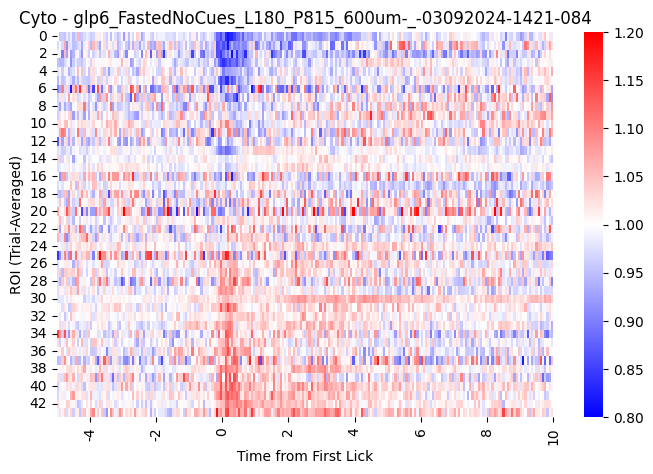

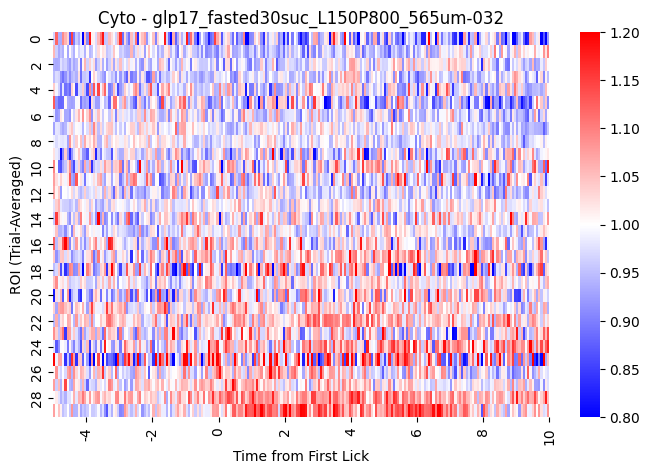

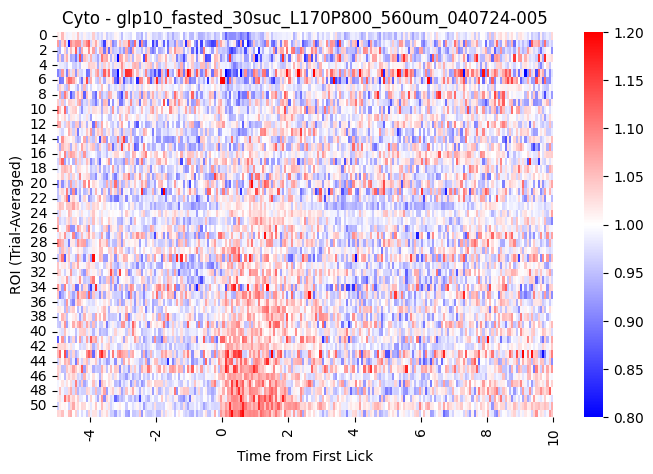

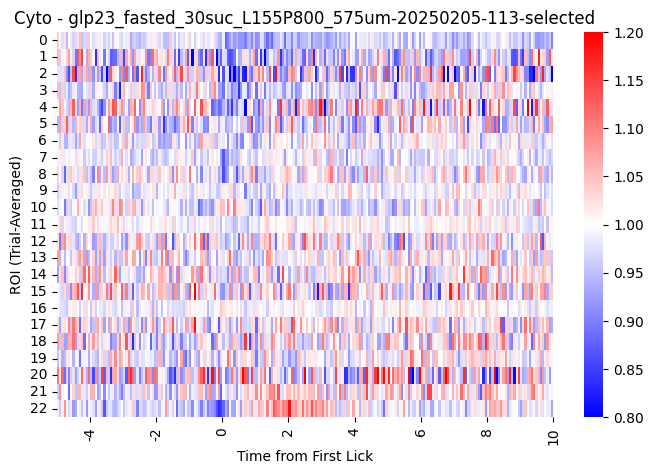

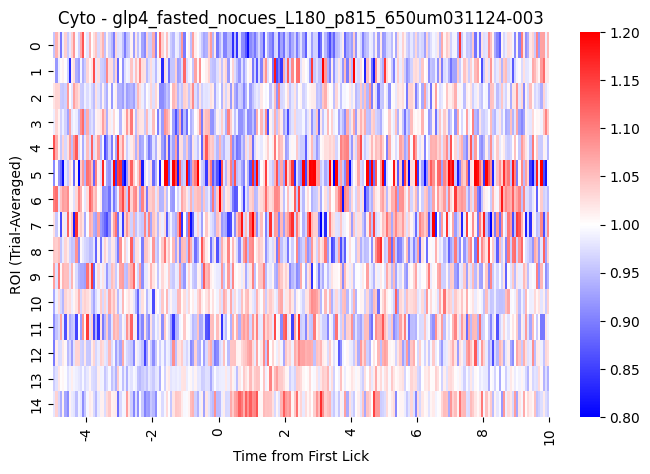

In [ ]:
folder = '/Users/savani/Downloads/2p_data/fasted 30 sucrose'
for subdir in [f for f in os.listdir(folder) if not f.startswith('.')]:
    matpath = os.path.join(folder, subdir, 'suite2p', 'plane0', 'behaviordata.mat')
    cyto_suite = os.path.join(folder, subdir, 'suite2p', 'plane0')
    manual_suite = os.path.join(folder, subdir, 'suite2p_manual')

    # Make heatmap from cyto suite2p
    f, iscell, ops = p2p.load_s2p_data(cyto_suite)
    filt_f = p2p.filter_cells(f, iscell)
    filt_f_reshaped = p2p.reshape_data(filt_f)
    filt_f_norm = p2p.normalize_data(filt_f_reshaped)
    bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matpath)
    successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
    successful_bout_start_frames = bout_start_frames[successful_trial_idx]
    successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
    filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)
    avg_f_cyto = p2p.average_trials(filt_f_aligned)

    # # Make heatmap from manual suite2p
    # f, iscell, ops = p2p.load_s2p_data(manual_suite)
    # filt_f = p2p.filter_cells(f, iscell, filter_by = 'second')
    # filt_f_reshaped = p2p.reshape_data(filt_f)
    # filt_f_norm = p2p.normalize_data(filt_f_reshaped)
    # bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matpath)
    # successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
    # successful_bout_start_frames = bout_start_frames[successful_trial_idx]
    # successful_filt_f = filt_f_norm[:, successful_trial_idx, :]
    # filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)
    # avg_f_manual = p2p.average_trials(filt_f_aligned)


    fig, ax = plt.subplots(1, figsize=(8, 5))
    # fig, ax = plt.subplots(1, figsize=(8, 5))
    ascending_order = np.argsort(np.nanmean(avg_f_cyto[:, 75:105], axis=1))
    sorted_avg_mean = avg_f_cyto[ascending_order, :]
    sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
    ax.set_xticks(np.arange(15, 255, 15)[::2])
    ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax.set_ylabel("ROI (Trial-Averaged)")
    ax.set_xlabel("Time from First Lick")
    ax.set_title(f"Cyto - {subdir}")

    # ascending_order = np.argsort(np.nanmean(avg_f_manual[:, 75:105], axis=1))
    # sorted_avg_mean = avg_f_manual[ascending_order, :]
    # sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap='bwr')
    # ax2.set_xticks(np.arange(15, 255, 15)[::2])
    # ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    # ax2.set_ylabel("ROI (Trial-Averaged)")
    # ax2.set_xlabel("Time from First Lick")
    # ax2.set_title(f"Manual")
    # fig.tight_layout(w_pad=2.0)

    # fig.savefig(os.path.join(folder, subdir, 'suite2p', 'heatmap_pop.png'), dpi=300)
    



Text(-0.55, 0.96, 'First Lick')

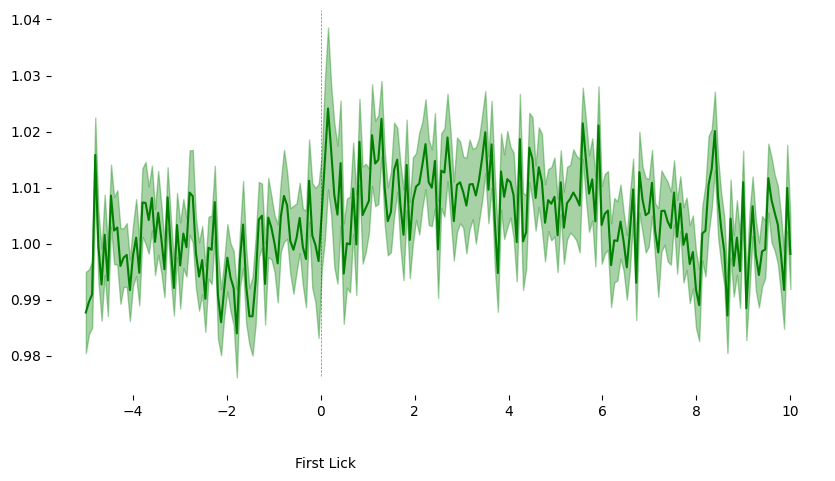

In [256]:
fig, ax = plt.subplots(1, figsize=(10, 5))
time = np.linspace(-5, 10, num=225)
avg_response = np.nanmean(avg_f, axis = 0)
sem_response = stats.sem(avg_f, axis = 0)
ax.plot(time, avg_response, color = 'green')
ax.fill_between(time, avg_response - sem_response, avg_response + sem_response, color = 'green', alpha = 0.35)
sns.despine(left=True, bottom=True)
# sb = add_scalebar(ax, matchx=False, sizex=5, labelx='5 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-0.55, 0.96, 'First Lick')

In [10]:
plt.close('all')

[28 38 26 24 18 36  6 43 42 41 31  5  2 19 23 25  8 37 40 12 30 10 27  7
 16 35 39 29 17 15 20  9 14 33  4 21  1  3 22 13 32 11  0 34]


/var/folders/0b/00sxp7js3s12st9d5np366540000gn/T/ipykernel_82469/781978163.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=(4, 2))


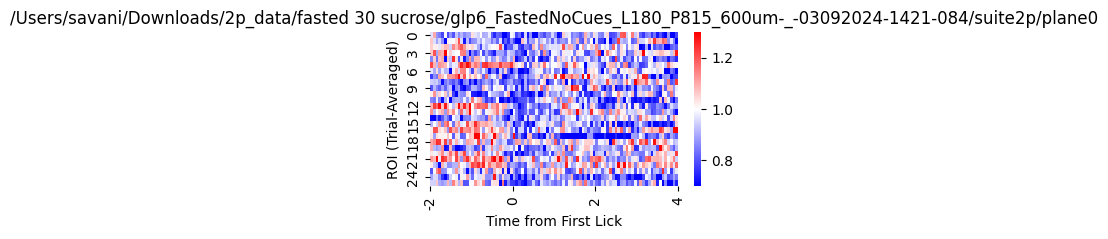

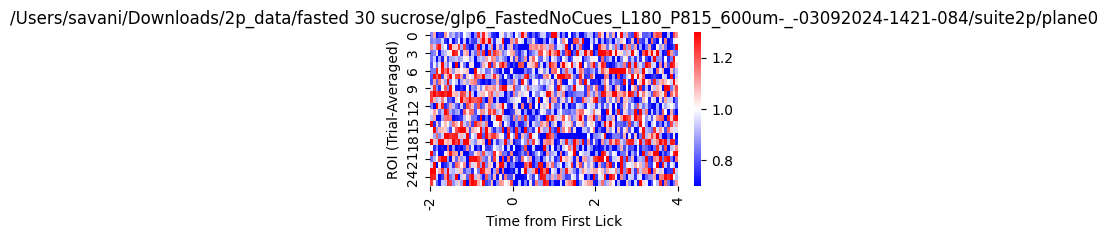

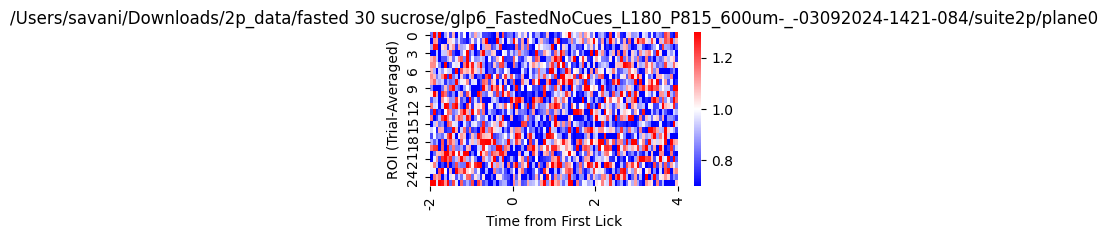

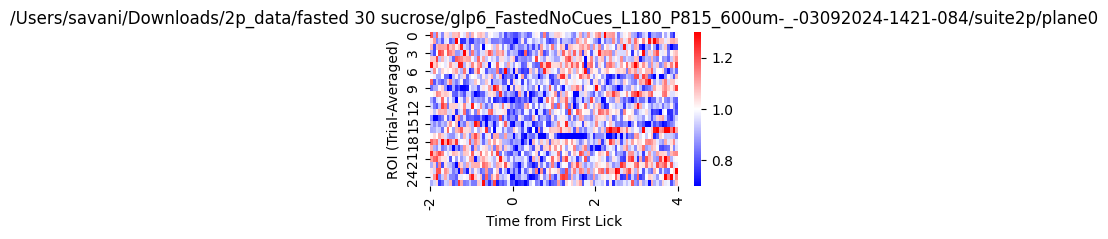

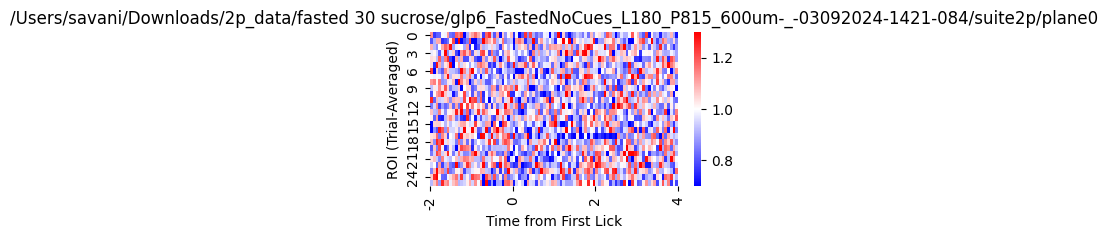

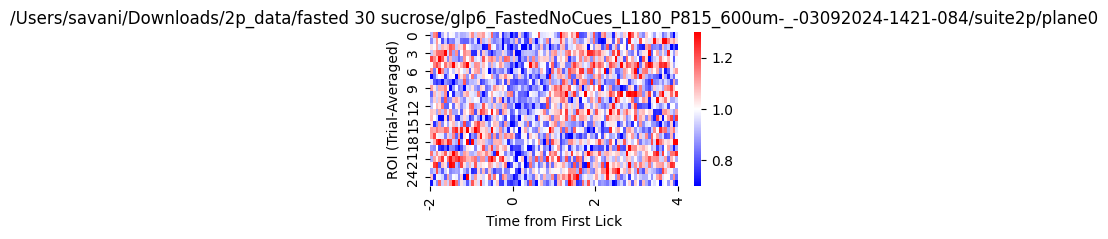

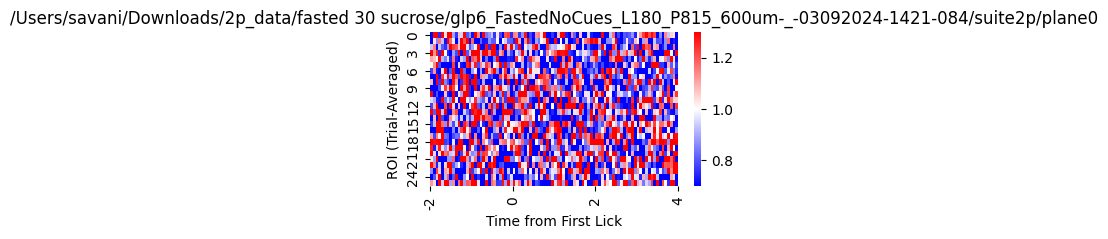

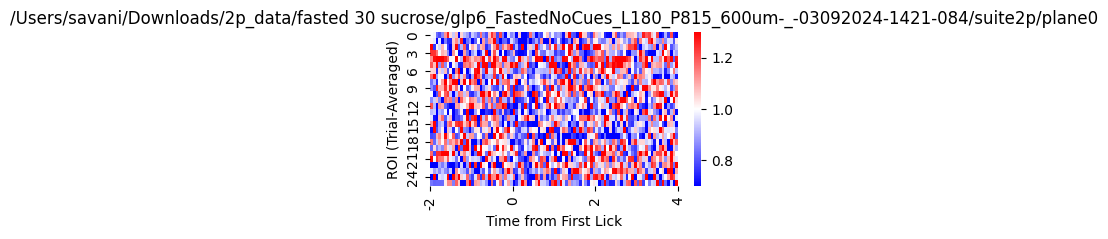

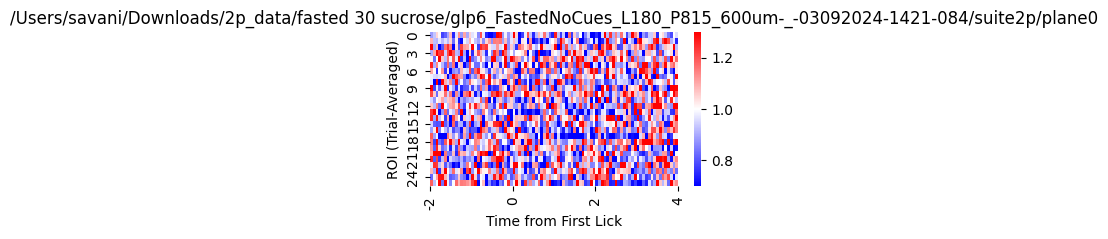

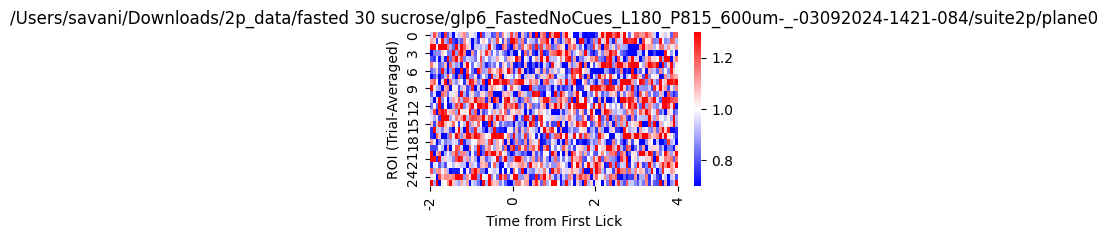

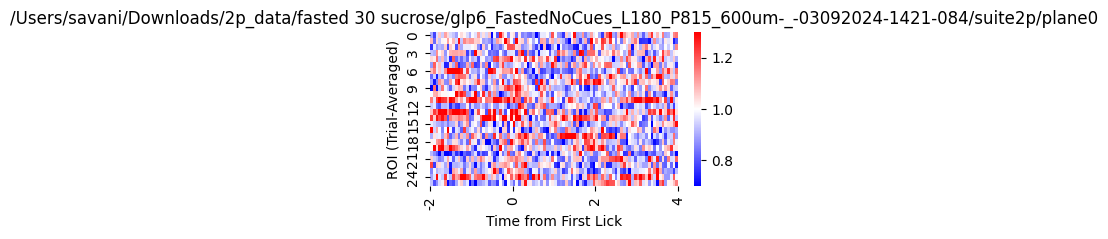

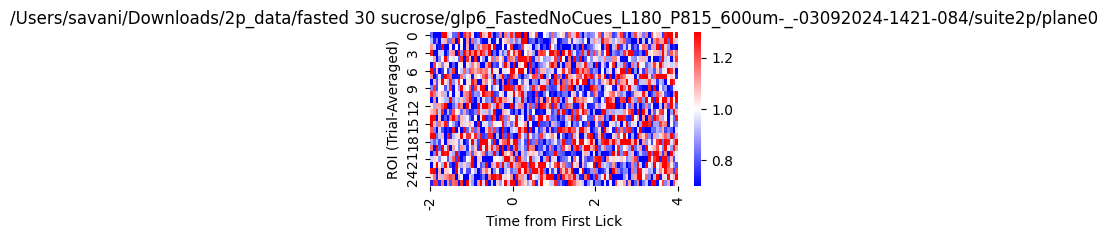

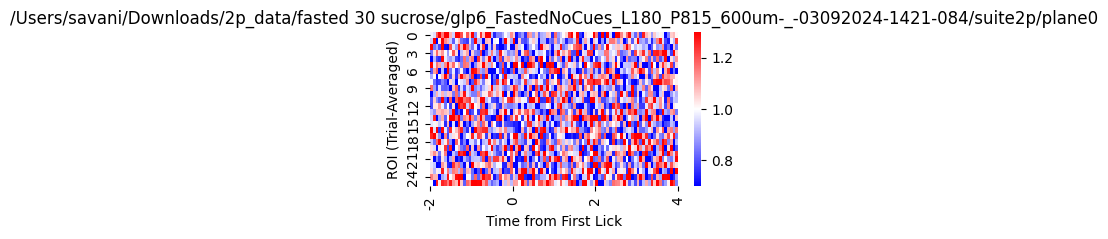

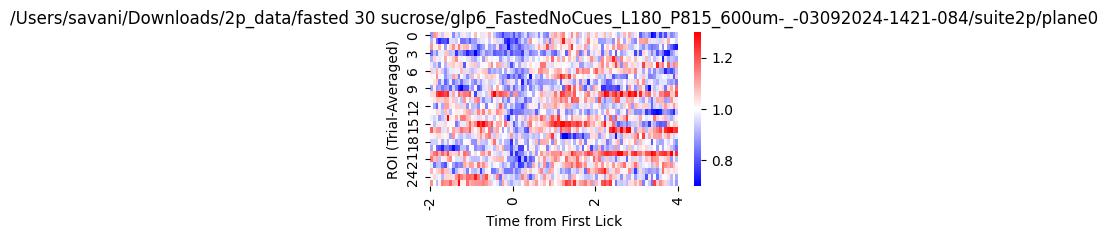

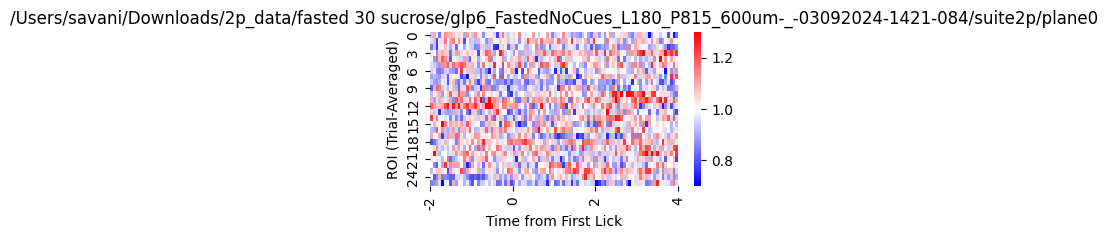

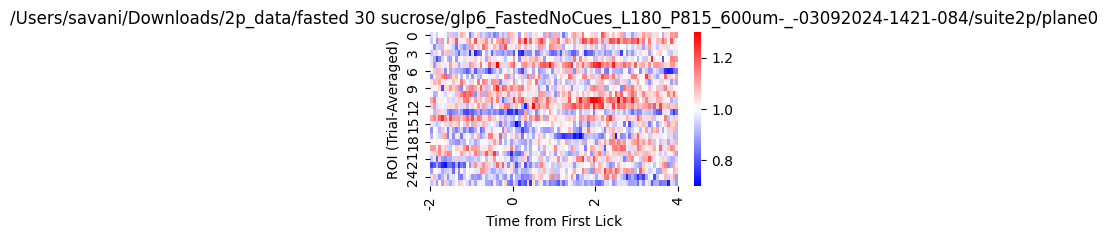

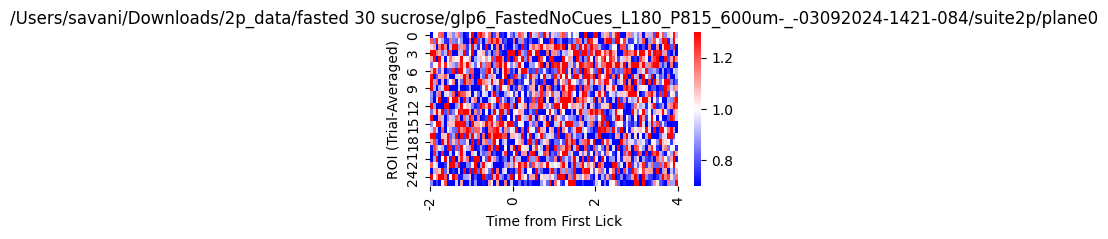

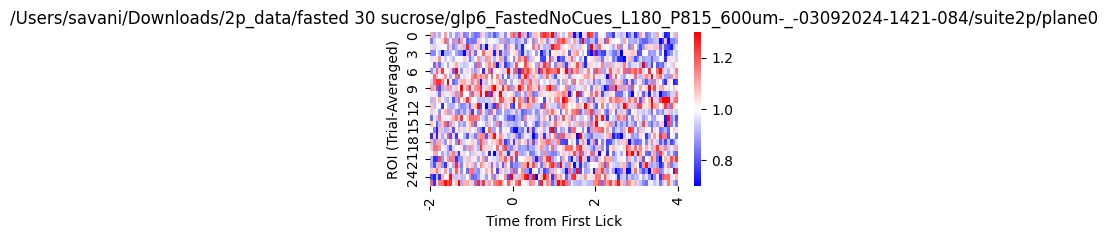

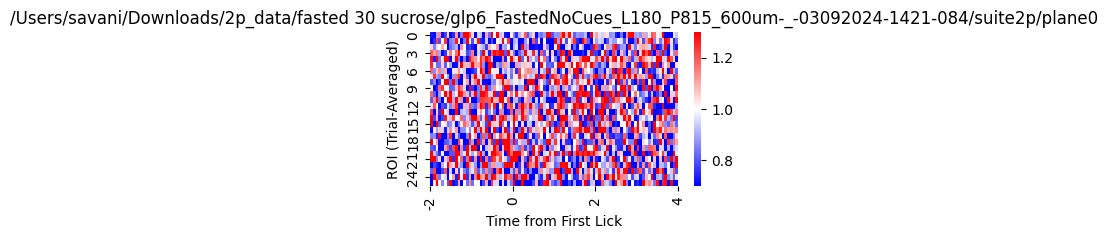

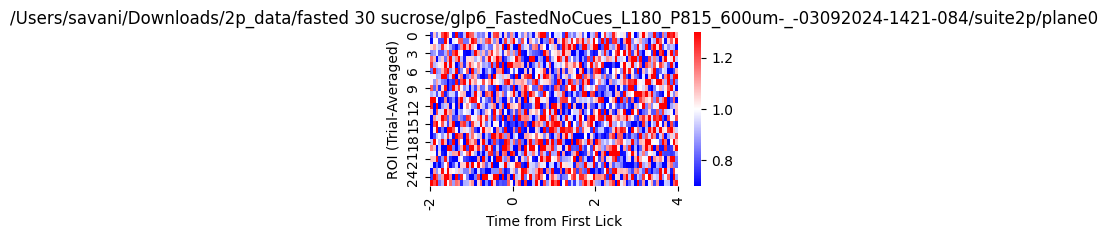

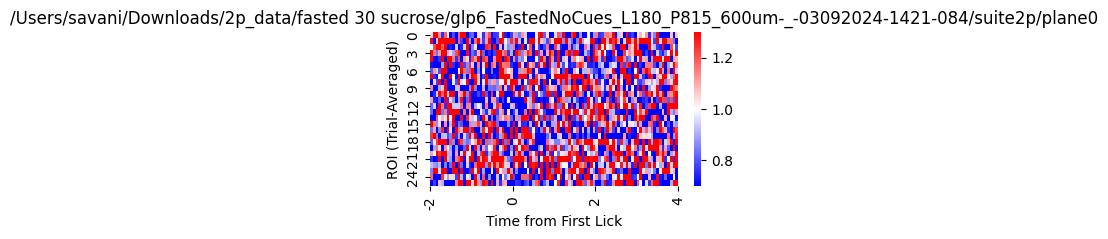

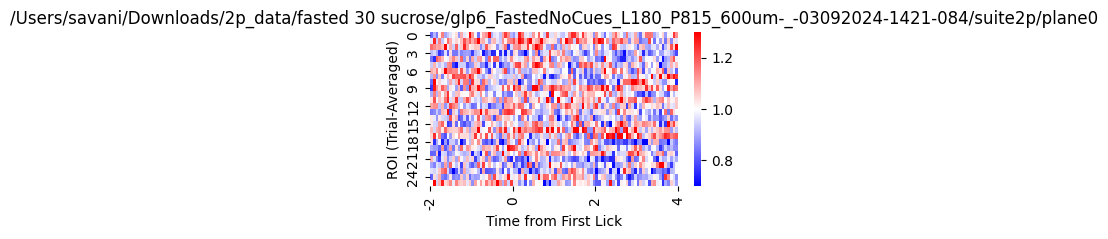

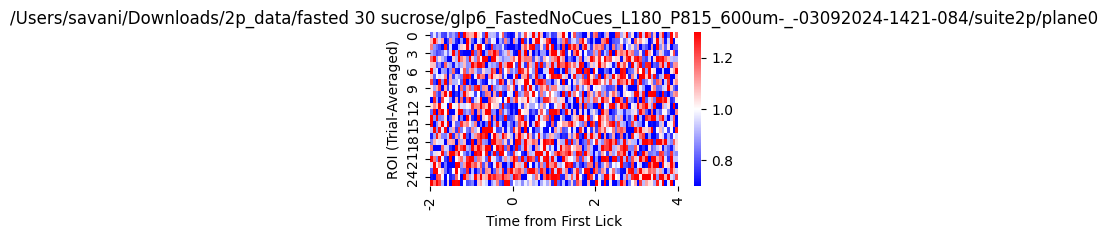

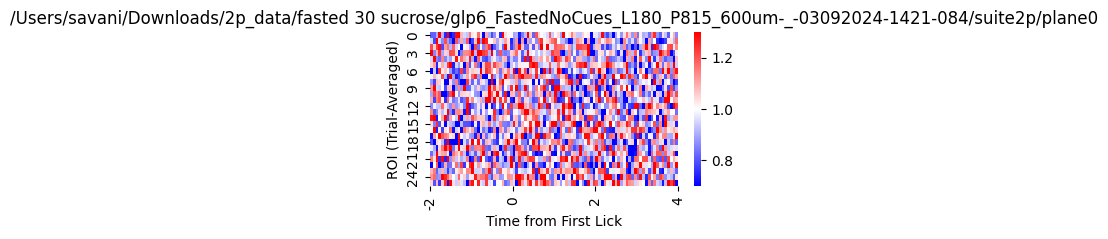

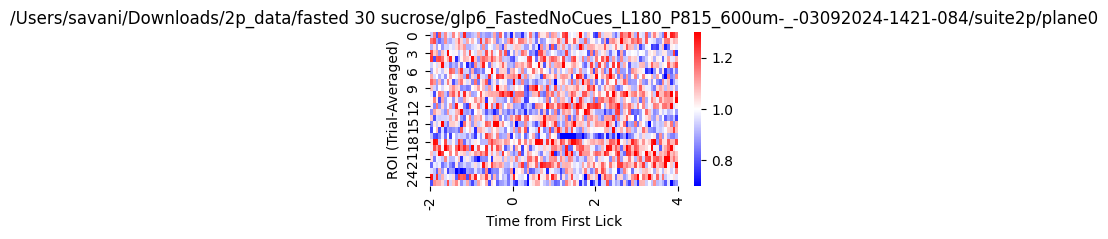

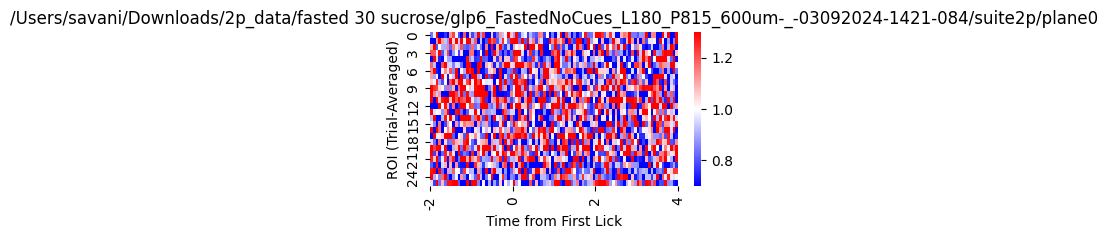

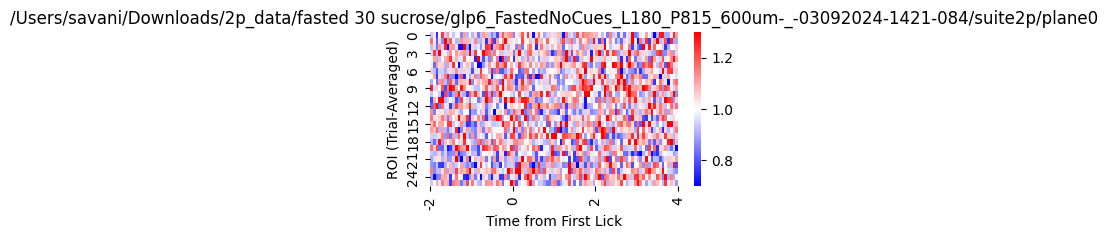

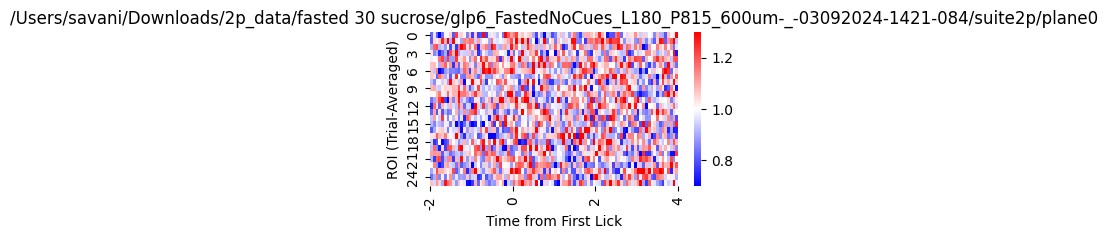

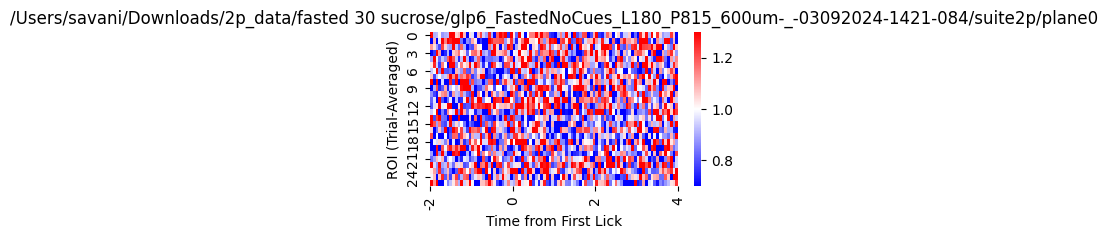

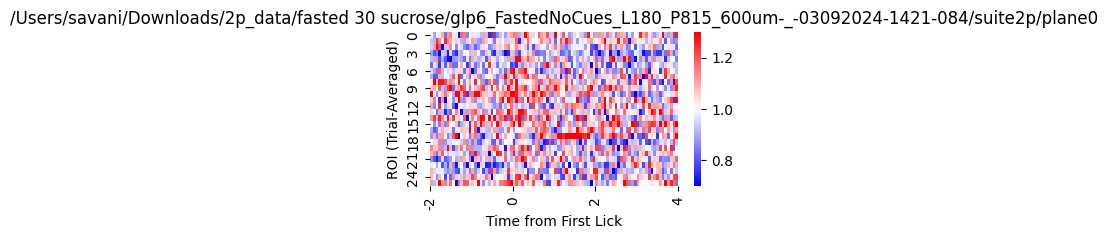

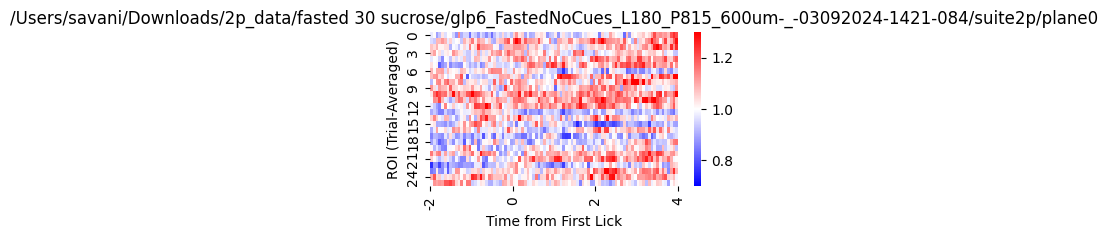

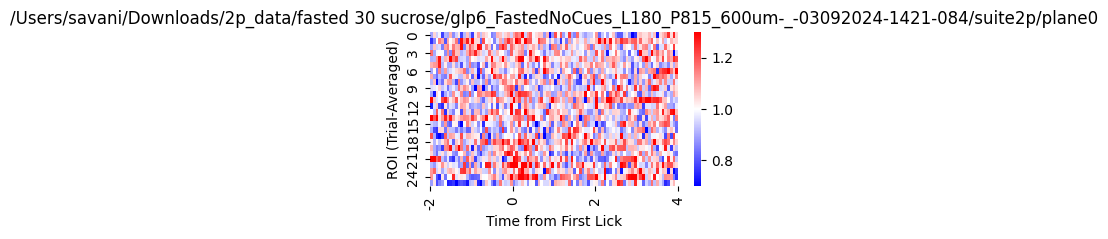

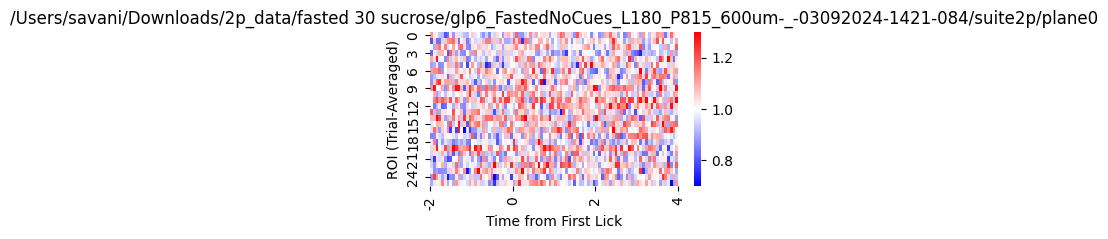

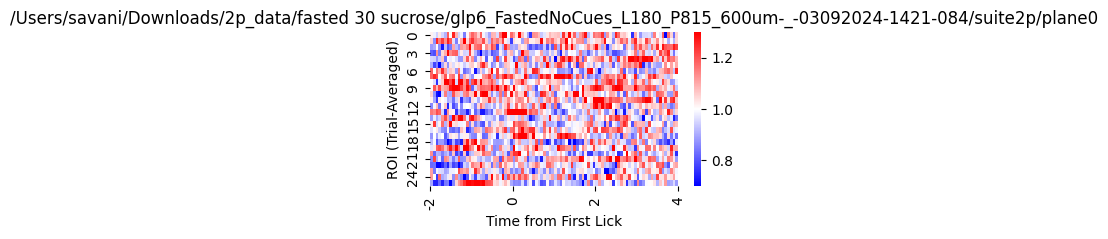

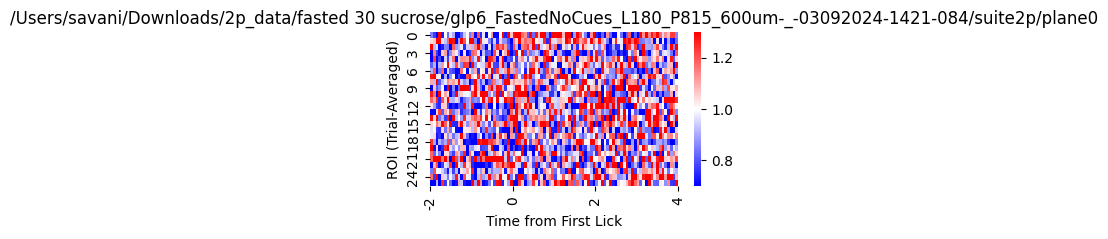

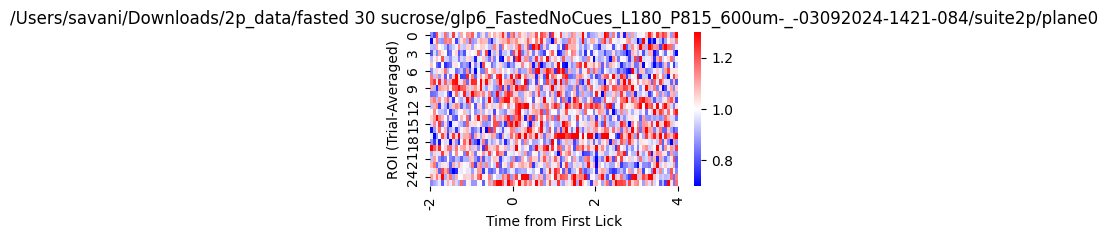

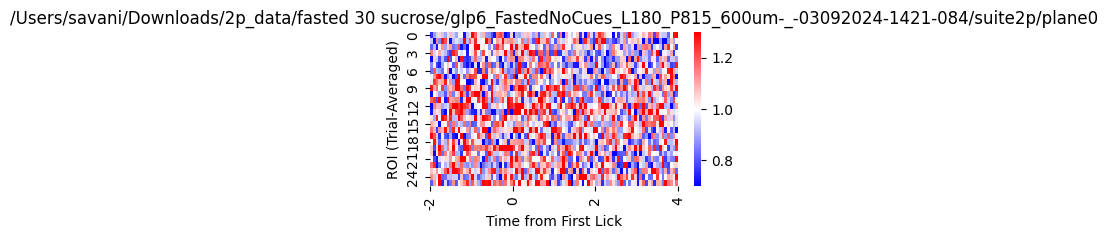

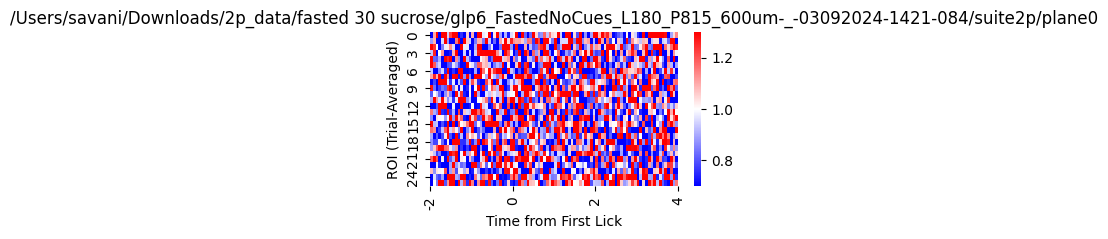

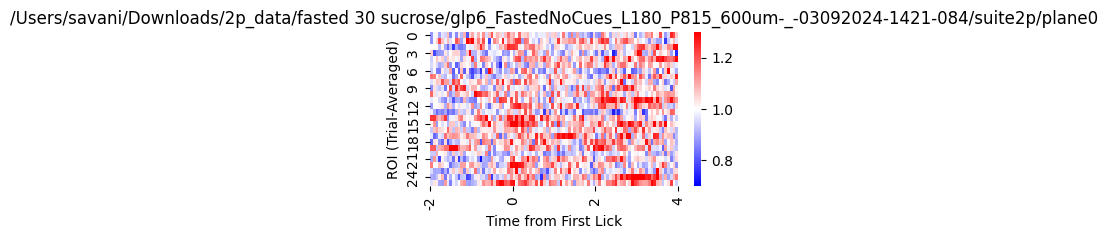

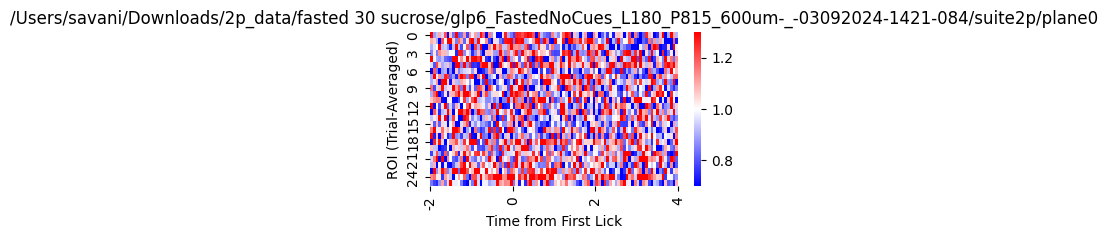

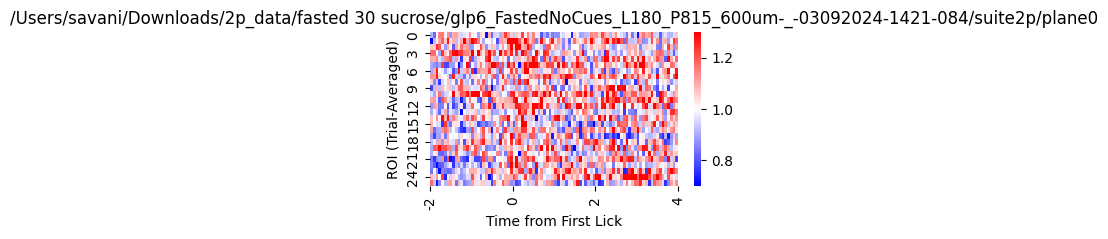

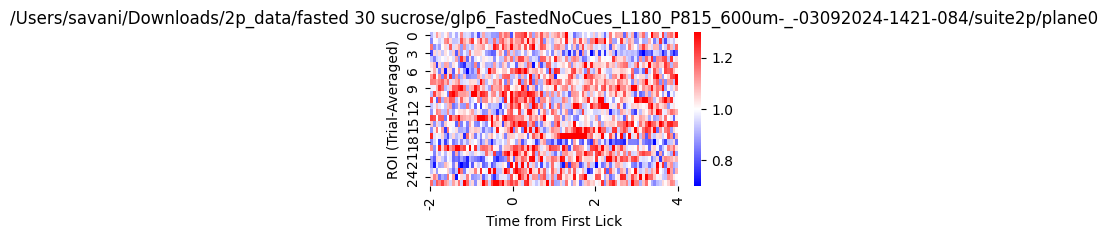

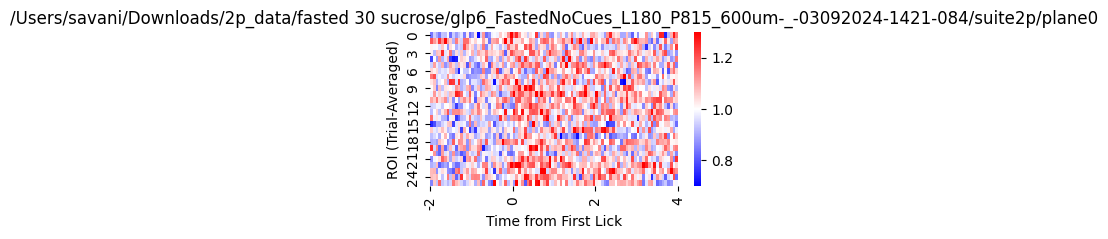

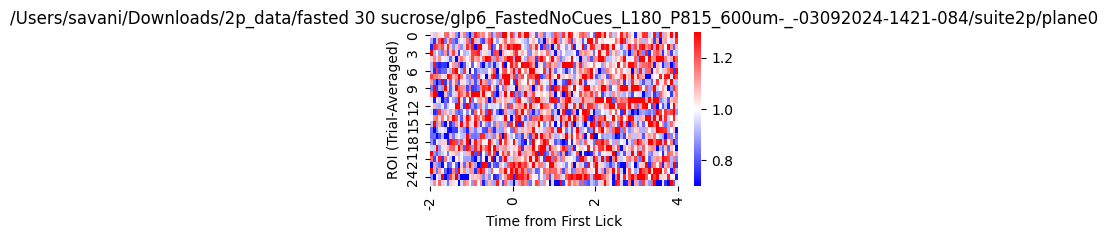

In [30]:
folder = '/Users/savani/Downloads/2p_data/fasted 30 sucrose/'
path = os.path.join(folder, os.listdir(folder)[0], 'suite2p', 'plane0')
# path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p_manual'
matfile = os.path.join(path, 'behaviordata.mat')
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
# ascending_order = [28, 19, 0]
filt_f_ordered = filt_f_aligned[ascending_order,:, :]
print(ascending_order)

for cell in range(filt_f_ordered.shape[0]):
    fig, ax = plt.subplots(1, figsize=(4, 2))
    sns.heatmap(filt_f_ordered[cell, :, :], ax = ax, vmin=0.7, vmax=1.3, cmap='bwr')
    ax.set_xticks(np.arange(15, 255, 15)[::2])
    ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax.set_ylabel("ROI (Trial-Averaged)")
    ax.set_xlabel("Time from First Lick")
    ax.set_title(f"{path}")
    ax.set_xlim(left = 45, right = 135)
